Name: Ashwini Giri.    USC ID: 5413882039 

# The LASSO and Boosting for Regression

(a) Download the Communities and Crime data from https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as
the training set and the rest as the test set.

The dataset is available on the UCI repository. Communities and Crime Data Set consists of 1994 rows and 127 columns. The columns here represent the predictors or the features except for the target column. The 'ViolentCrimesPerPop' is the target or response column.
.The dataset was not present in an dowloadable format, hence I have created a 'csv file' which contains the dataset. The column headers are also been appended to the csv file. The dataset contains missing values and they are represented by '?' symbol. Hence passing na_values attribute while reading the csv file into a dataframe.

The dataset also contains some unrelated attributes, hence I will be dropping these attributes as they are not related to the predictor.
-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal) 
-- county: numeric code for county - not predictive, and many missing values (numeric) 
-- community: numeric code for community - not predictive and many missing values (numeric) 
-- communityname: community name - not predictive - for information only (string) 
-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric). As these 5 features are not used in prediction of the goal we ca exclude these attributes from the dataframe. Hence I will drop these attributes while using the dataset.

Below are the imports used for the entire problem.

In [541]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import operator
import math
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn import cross_validation
from xgboost.sklearn import XGBRegressor
import xgboost as xg
import random

Reading the dataset stored as a csv file on the local machine. The dataset is loaded into the variable dataframe using pandas library.

In [398]:
dataframe = pd.read_csv('question1dataset.csv',na_values=['?'])

Below is the dataframe with all features and missing values. Printed the first 5 rows from the dataset to give a glimpse of the data.

In [399]:
dataframe.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In the below code, dropping the features which are non-predictive. Hence dropping columns 0,1,2,3,4(state,county,community,communityname,fold).

In [400]:
for i in range(0,5):
    dataframe.drop(dataframe.columns[[0]],axis=1,inplace=True)

Below is the dataframe with dropped non-predictive features.

In [401]:
dataframe.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


(b) The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set.

There are many imputation techniques to handle the missing values. One of which is dropping the entire row having missing value. As we can see from the count of missing values in the dataset, there are many missing values, hence dropping them will not be a good idea. I have median as an imputation technique to handle the missing values. I have calculated the median of each feature and replaced the missing value of the feature with the respective median value of that feature.

In the below piece of code we can see the number of missing values in each predictor.

In [402]:
columns = dataframe.columns
missing_values = dataframe.isnull().sum().tolist()
for i in range(0,len(columns)):
    print('Predictor:',columns[i],' Number of missing values:',missing_values[i])

Predictor:  population  Number of missing values: 0
Predictor:  householdsize  Number of missing values: 0
Predictor:  racepctblack  Number of missing values: 0
Predictor:  racePctWhite  Number of missing values: 0
Predictor:  racePctAsian  Number of missing values: 0
Predictor:  racePctHisp  Number of missing values: 0
Predictor:  agePct12t21  Number of missing values: 0
Predictor:  agePct12t29  Number of missing values: 0
Predictor:  agePct16t24  Number of missing values: 0
Predictor:  agePct65up  Number of missing values: 0
Predictor:  numbUrban  Number of missing values: 0
Predictor:  pctUrban  Number of missing values: 0
Predictor:  medIncome  Number of missing values: 0
Predictor:  pctWWage  Number of missing values: 0
Predictor:  pctWFarmSelf  Number of missing values: 0
Predictor:  pctWInvInc  Number of missing values: 0
Predictor:  pctWSocSec  Number of missing values: 0
Predictor:  pctWPubAsst  Number of missing values: 0
Predictor:  pctWRetire  Number of missing values: 0
Pr

Finding the columns which have missing values and storing the names of the columns in list missing_values_columns

In [403]:
missing_values_columns = []
for i in range(0,len(columns)):
    if missing_values[i] != 0:
        missing_values_columns.append(columns[i])

In [404]:
print(missing_values_columns)

[' OtherPerCap', ' LemasSwornFT', ' LemasSwFTPerPop', ' LemasSwFTFieldOps', ' LemasSwFTFieldPerPop', ' LemasTotalReq', ' LemasTotReqPerPop', ' PolicReqPerOffic', ' PolicPerPop', ' RacialMatchCommPol', ' PctPolicWhite', ' PctPolicBlack', ' PctPolicHisp', ' PctPolicAsian', ' PctPolicMinor', ' OfficAssgnDrugUnits', ' NumKindsDrugsSeiz', ' PolicAveOTWorked', ' PolicCars', ' PolicOperBudg', ' LemasPctPolicOnPatr', ' LemasGangUnitDeploy', ' PolicBudgPerPop']


Calculating median of each column which contains missing values. We need this for imputation.

In [405]:
median = dataframe[missing_values_columns].median().tolist()

In [406]:
print(median)

[0.25, 0.02, 0.18, 0.97, 0.21, 0.04, 0.17, 0.29, 0.18, 0.74, 0.78, 0.12, 0.06, 0.0, 0.2, 0.04, 0.57, 0.26, 0.08, 0.03, 0.75, 0.5, 0.15]


printing the overview of the columns having missing values.

In [407]:
dataframe[missing_values_columns].head()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,...,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
0,0.36,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,...,0.1,0.07,0.02,0.57,0.29,0.06,0.04,0.9,0.5,0.14
1,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replacing the missing values with median of that predictor.

In [408]:
for i in range(0,len(missing_values_columns)):
    dataframe[missing_values_columns[i]] = dataframe[missing_values_columns[i]].fillna(median[i])
    
dataframe[missing_values_columns].head()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,...,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
0,0.36,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,...,0.1,0.07,0.02,0.57,0.29,0.06,0.04,0.90,0.5,0.14
1,0.22,0.02,0.18,0.97,0.21,0.04,0.17,0.29,0.18,0.74,...,0.0,0.20,0.04,0.57,0.26,0.08,0.03,0.75,0.5,0.15
2,0.28,0.02,0.18,0.97,0.21,0.04,0.17,0.29,0.18,0.74,...,0.0,0.20,0.04,0.57,0.26,0.08,0.03,0.75,0.5,0.15
3,0.36,0.02,0.18,0.97,0.21,0.04,0.17,0.29,0.18,0.74,...,0.0,0.20,0.04,0.57,0.26,0.08,0.03,0.75,0.5,0.15
4,0.51,0.02,0.18,0.97,0.21,0.04,0.17,0.29,0.18,0.74,...,0.0,0.20,0.04,0.57,0.26,0.08,0.03,0.75,0.5,0.15


Checking if there are any missing values left after imputation. If There are any present then imputation should be done again. We are checking this by calculating number of 'NA' values in the dataframe.

In [409]:
dataframe.isnull().sum()

 population              0
 householdsize           0
 racepctblack            0
 racePctWhite            0
 racePctAsian            0
 racePctHisp             0
 agePct12t21             0
 agePct12t29             0
 agePct16t24             0
 agePct65up              0
 numbUrban               0
 pctUrban                0
 medIncome               0
 pctWWage                0
 pctWFarmSelf            0
 pctWInvInc              0
 pctWSocSec              0
 pctWPubAsst             0
 pctWRetire              0
 medFamInc               0
 perCapInc               0
 whitePerCap             0
 blackPerCap             0
 indianPerCap            0
 AsianPerCap             0
 OtherPerCap             0
 HispPerCap              0
 NumUnderPov             0
 PctPopUnderPov          0
 PctLess9thGrade         0
                        ..
 PctSameHouse85          0
 PctSameCity85           0
 PctSameState85          0
 LemasSwornFT            0
 LemasSwFTPerPop         0
 LemasSwFTFieldOps       0
 

As there are no missing values left, we can say that the imputation has been successfully done.

(c) Plot a correlation matrix for the features in the data set.

Below is the code for plotting a correlation matrix. Using seaborn to plot the matrix and pandas function corr() to calculate the correlation between the predictors. The bar shows the values represented for the color used in the matrix. We can read the matrix as we read any point on a 2D graph. The x-axis contains all the predictors and the y-axis also contains all the predictors. Hence if we want to know the correlation between population and policeCars we can search population on x-axis and policeCars on y-axis or viceversa. See the color used and then determine the correlation using the colorbar on the right hand side of the matrix.

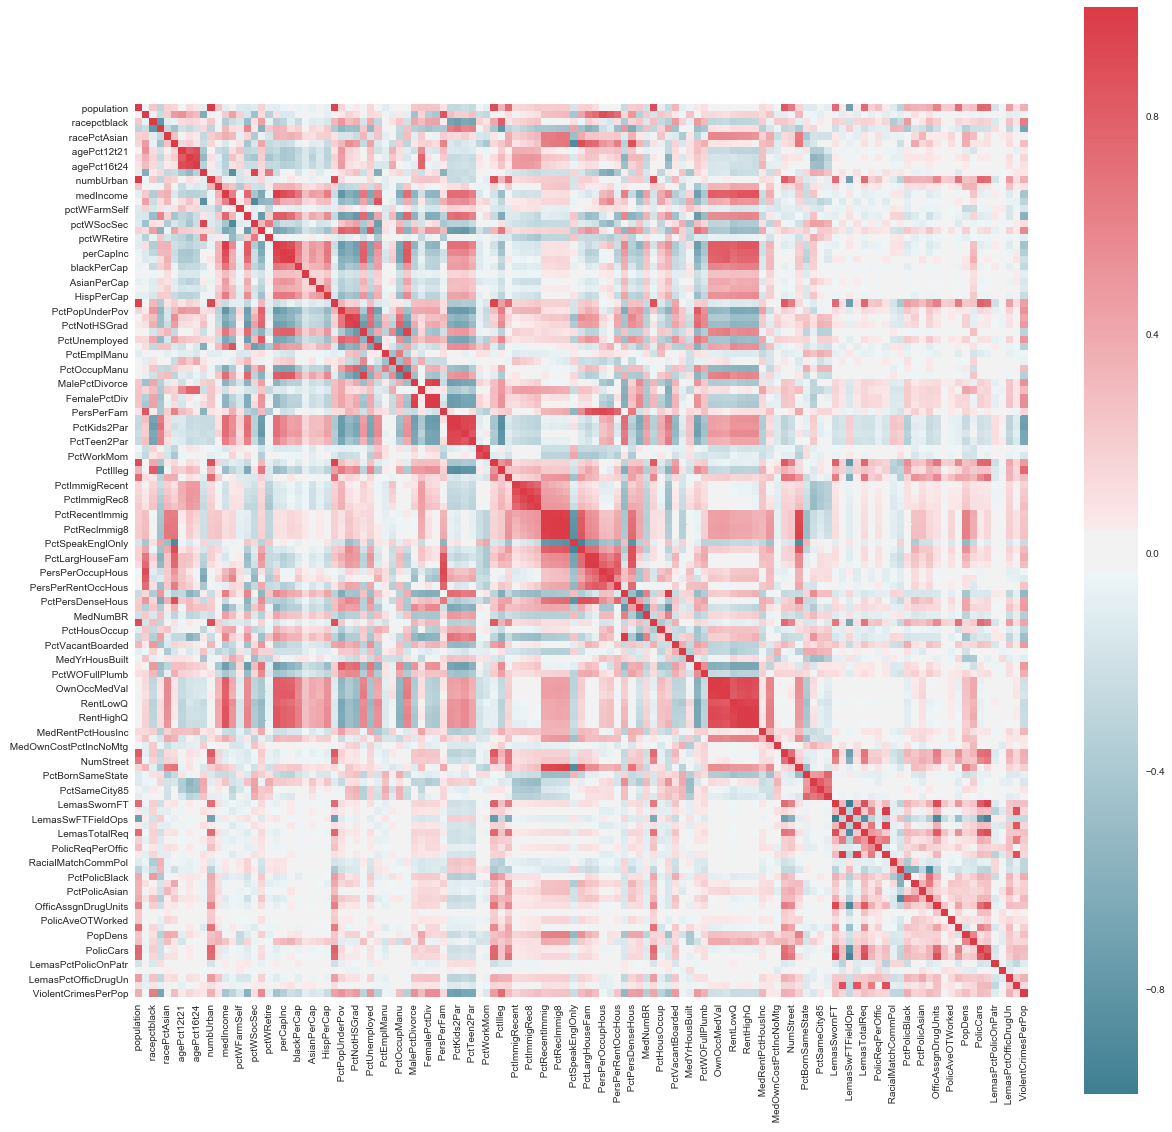

In [410]:
f, ax = plt.subplots(figsize=(20, 20))
corr = dataframe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

(d) Calculate the Coefficient of Variation for each feature.

The coefficient of variation is defined as a fraction of the sample standard deviation to the sample mean. Calculating the coefficient of variation for each feature by the formula CV=s/m. The coefficient of variation is stored in a dictionary where key is the name of the feature and value is the coefficient of variation. The variable cv_dict is used for the dictionary.

In [411]:
cv_list = []
cv_dict = {}
for col in dataframe.columns:
    cv = dataframe[col].std()/dataframe[col].mean()
    cv_dict[col] = cv 
    cv_list.append(cv)

In [412]:
cv_dict

{' AsianPerCap': 0.6061938508790911,
 ' FemalePctDiv': 0.3592727036887422,
 ' HispPerCap': 0.4739597186074789,
 ' HousVacant': 1.9587797297820901,
 ' LandArea': 1.6780314766044726,
 ' LemasGangUnitDeploy': 0.33348282511993416,
 ' LemasPctOfficDrugUn': 2.555266002927139,
 ' LemasPctPolicOnPatr': 0.11797883319000711,
 ' LemasSwFTFieldOps': 0.05751474166783882,
 ' LemasSwFTFieldPerPop': 0.29353792173117393,
 ' LemasSwFTPerPop': 0.35131881632896145,
 ' LemasSwornFT': 2.0807122912623375,
 ' LemasTotReqPerPop': 0.3826339397459969,
 ' LemasTotalReq': 1.38170615207362,
 ' MalePctDivorce': 0.3955833690023806,
 ' MalePctNevMarr': 0.40381161614997696,
 ' MedNumBR': 0.81088779089827,
 ' MedOwnCostPctInc': 0.41639116844577034,
 ' MedOwnCostPctIncNoMtg': 0.4769332389840339,
 ' MedRent': 0.5555924710054465,
 ' MedRentPctHousInc': 0.3458295188200763,
 ' MedYrHousBuilt': 0.4704114254272567,
 ' NumIlleg': 2.9941964494842983,
 ' NumImmig': 2.9004971638852743,
 ' NumInShelters': 3.4854812687233436,
 ' Num

e) Pick ⌊ 128⌋ features with highest CV, and make scatter plots and box plots
 for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots?

In the below code sorting the dictionary on values, that means sorting the dictionary based on coefficient of validation in ascending order. I am doing this because we need to Pick ⌊ 128⌋ features with highest CV.

In [413]:
sorted_cv_dict = sorted(cv_dict.items(), key=operator.itemgetter(1))
sorted_cv_dict

[(' LemasSwFTFieldOps', 0.05751474166783882),
 (' PctPolicWhite', 0.11737235347420459),
 (' LemasPctPolicOnPatr', 0.11797883319000711),
 (' RacialMatchCommPol', 0.12635405449579515),
 (' NumKindsDrugsSeiz', 0.14322730136445924),
 (' PctHousOccup', 0.2696469683591537),
 (' PolicReqPerOffic', 0.27189277669003076),
 (' PctSpeakEnglOnly', 0.2886731728622227),
 (' agePct12t29', 0.29069288841904145),
 (' LemasSwFTFieldPerPop', 0.29353792173117393),
 (' PctSameState85', 0.30423972791934834),
 (' PersPerFam', 0.31695474768257587),
 (' PersPerOwnOccHous', 0.3194072884726598),
 (' PctSameCity85', 0.32010477989100095),
 (' racePctWhite', 0.3237815624993411),
 (' pctWWage', 0.3277100586060616),
 (' PctTeen2Par', 0.32855094726896933),
 (' PctYoungKids2Par', 0.3294258419264571),
 (' PctFam2Par', 0.3306111369901614),
 (' PctKids2Par', 0.3324758807131056),
 (' PctWorkMom', 0.3327221175201113),
 (' LemasGangUnitDeploy', 0.33348282511993416),
 (' PctBornSameState', 0.33557452808495797),
 (' PctWorkMomYo

In the below code calculating the square root of 128 and then picking 11 features with highest coefficient of variation. The feature names for these 11 features are stored in list type variable 'columns_highest_cv.

In [414]:
root_val = math.sqrt(128)
root_val = math.floor(root_val)
columns_highest_cv=[]
for i in range(0,root_val):
    columns_highest_cv.append(sorted_cv_dict[i][0])
print(columns_highest_cv)

[' LemasSwFTFieldOps', ' PctPolicWhite', ' LemasPctPolicOnPatr', ' RacialMatchCommPol', ' NumKindsDrugsSeiz', ' PctHousOccup', ' PolicReqPerOffic', ' PctSpeakEnglOnly', ' agePct12t29', ' LemasSwFTFieldPerPop', ' PctSameState85']


In the below code making scatter plots for the features with highest CV. I am using seaborn package to make the scatter plots.

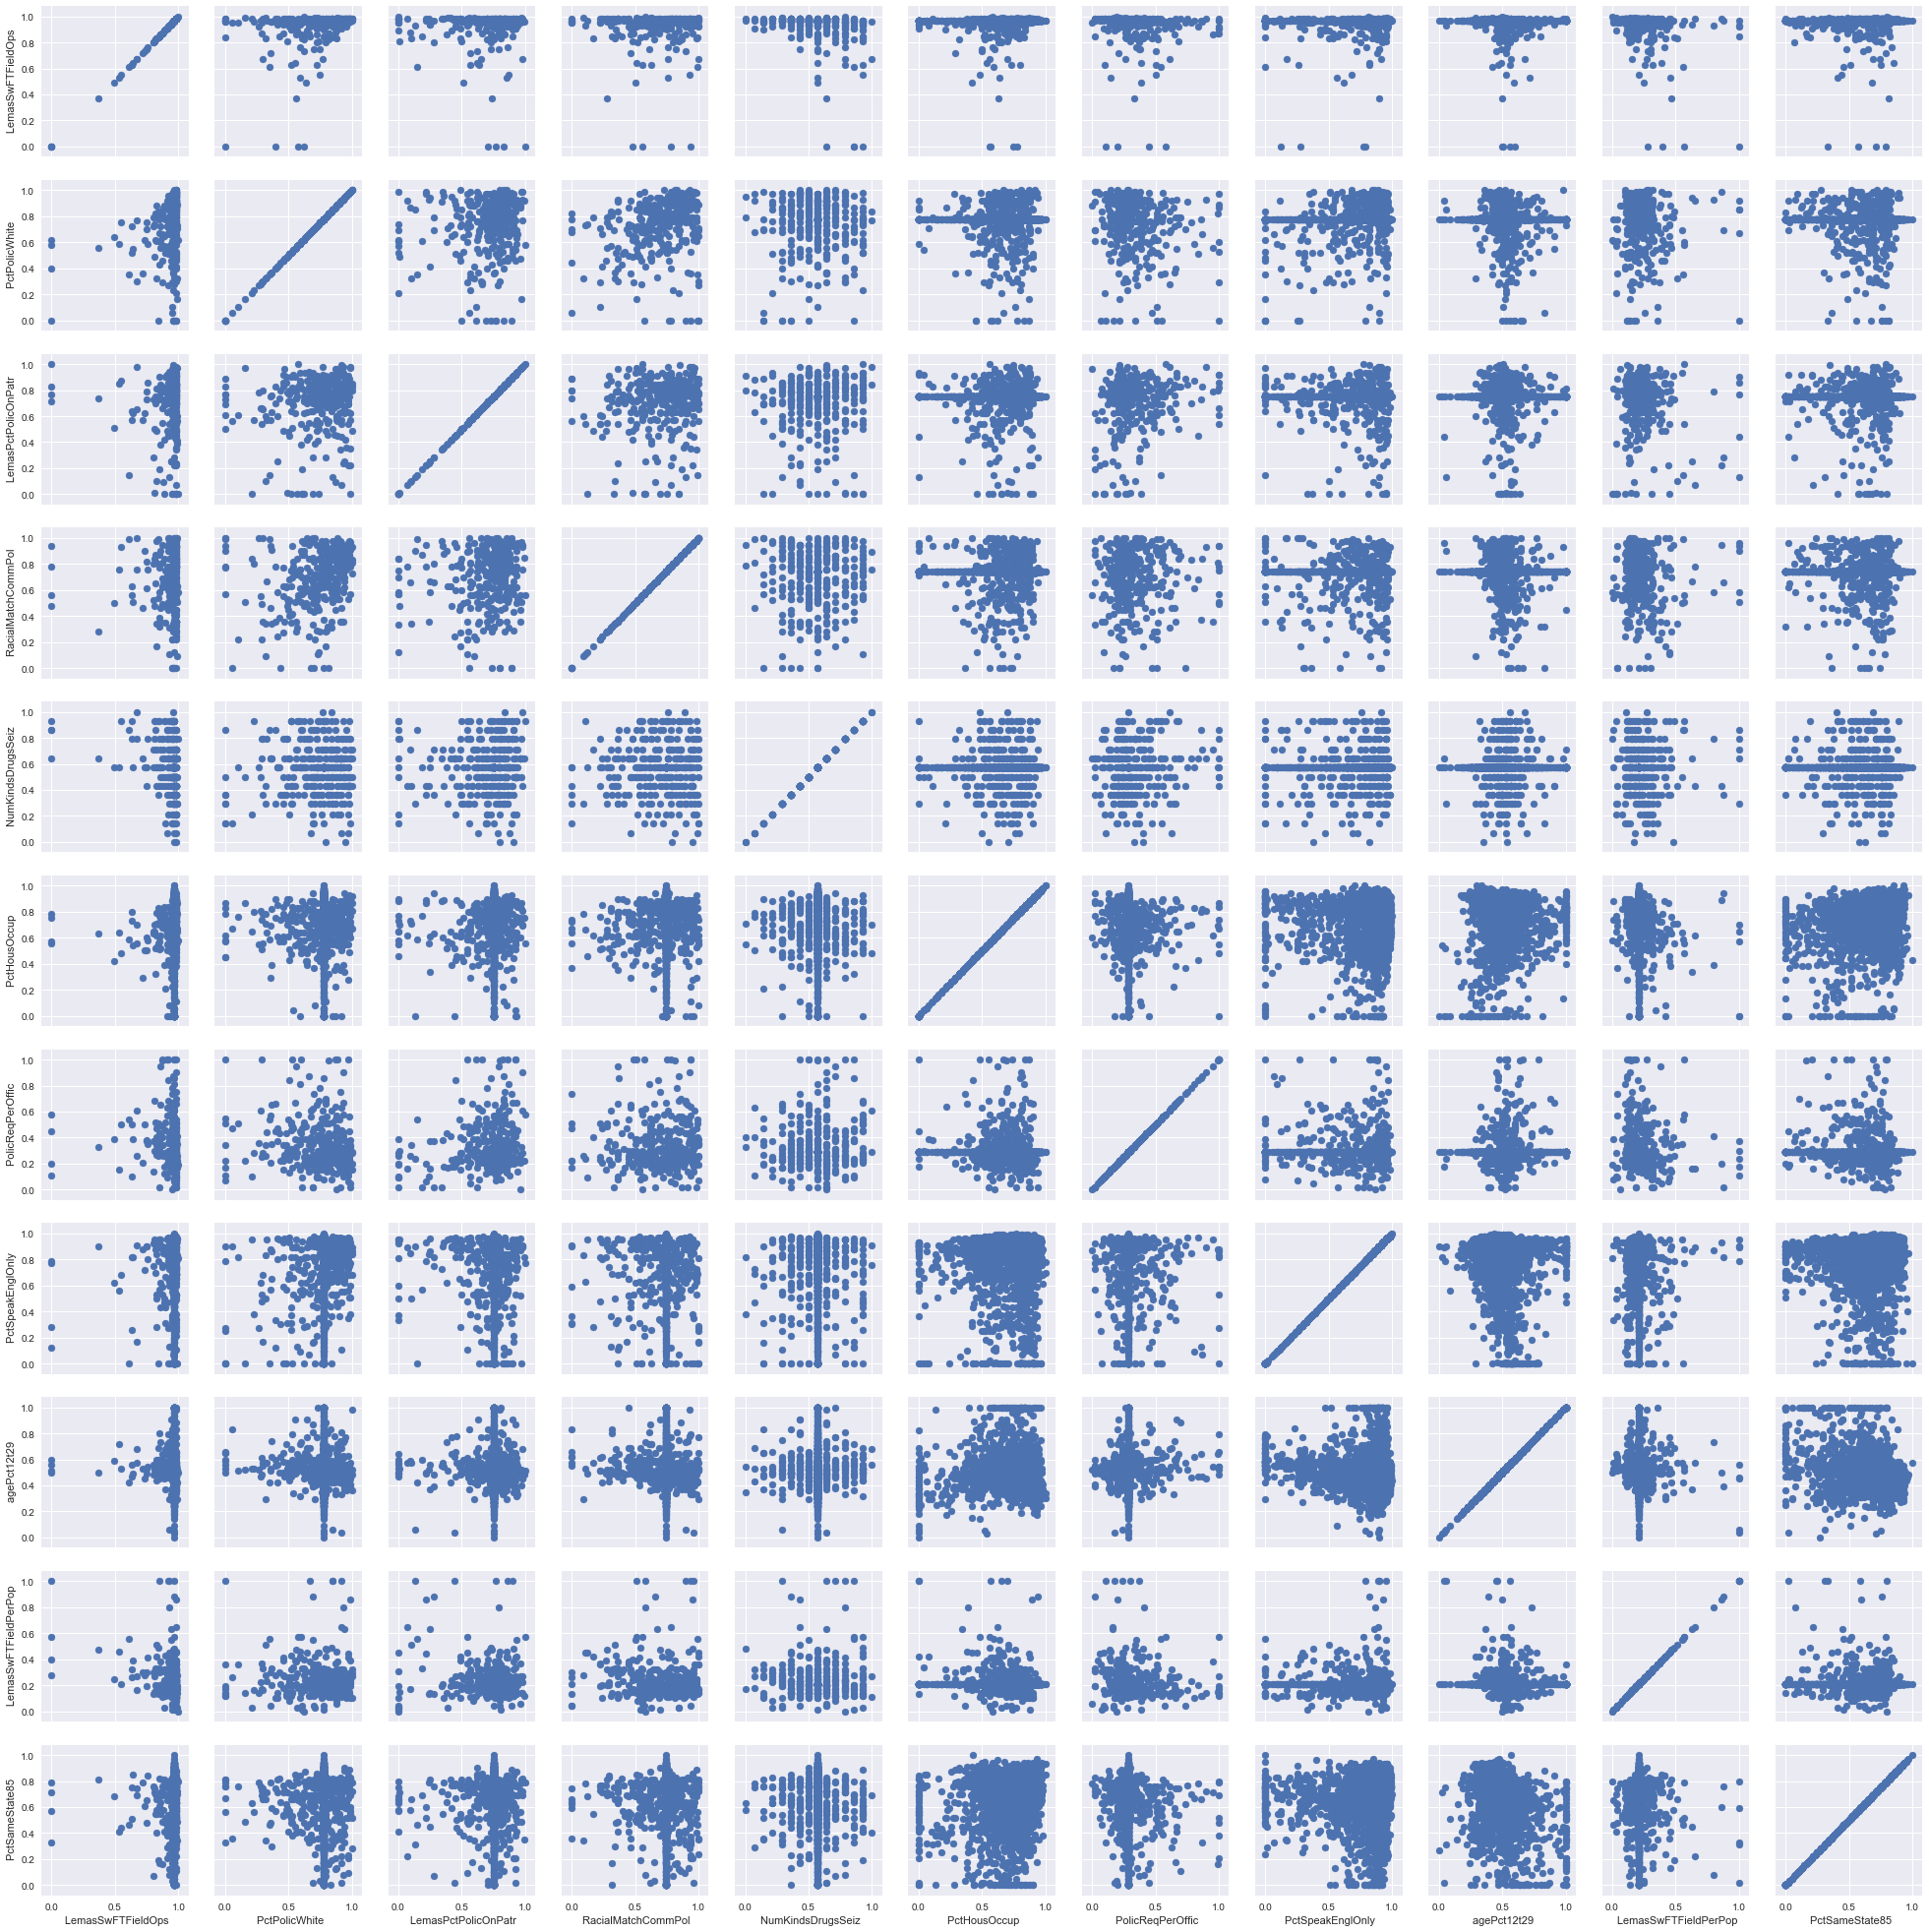

In [359]:
g = sns.PairGrid(dataframe, vars=columns_highest_cv)
g = g.map(plt.scatter)

In the below code making box plots for the features with highest CV. 

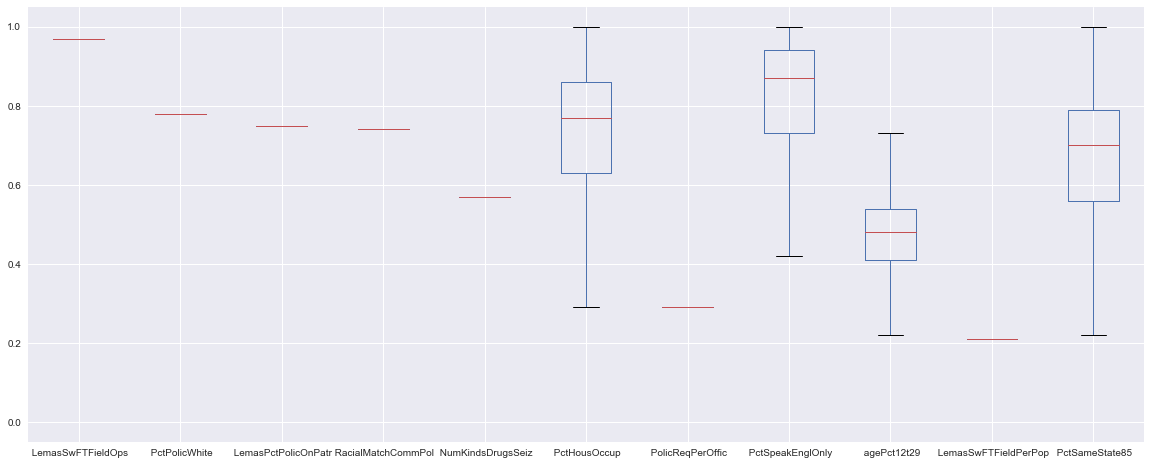

In [415]:
dataframe[columns_highest_cv].plot(kind='box', figsize=[20,8])

Box plots using matplotlib and subplots

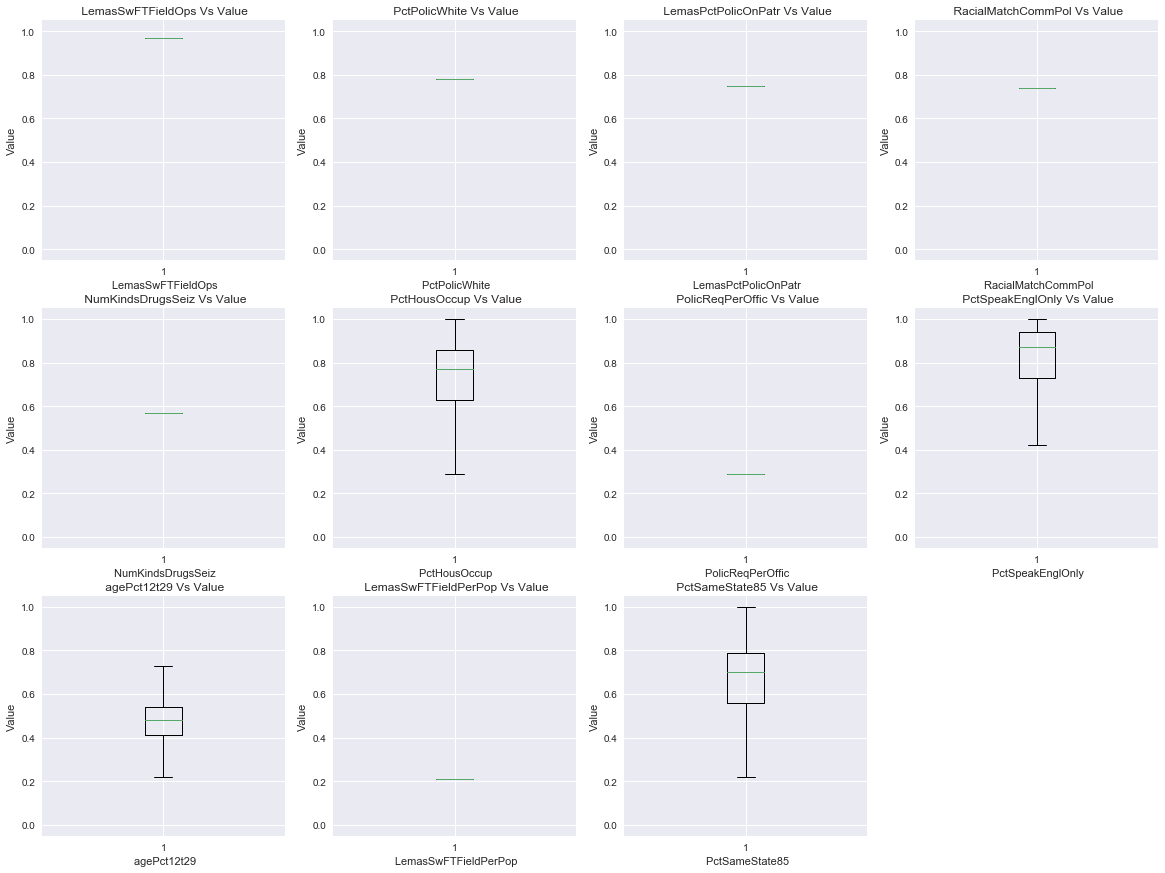

In [361]:
plt.figure(figsize=(20,15))
i=1
for p in columns_highest_cv:
    plt.subplot(3,4,i)
    plt.boxplot(dataframe[p])
    plt.xlabel(p)
    plt.ylabel('Value')
    tit = p + " Vs Value"
    plt.title(tit)
    i+=1
plt.show()

In the above code the plotting is done using matplotlib pyplot and subplots.

(f) Fit a linear model using least squares to the training set and report the test error.

In the below code splitting the data into training and testing datasets. As stated in the problem the first 1495 rows should be used for training and the remaining are used for testing. Hence using numpy's split function to split the complete dataframe into training dataframe stored in variable training_dataframe and testing dataframe stored in variable testing_dataframe. Then I am seperating the train data and the train lables and also the test data and test lables. For this again using numpy's split function. Storing the train data in variable training_dataframe, train labels in training_dataframe_label, test data in testing_dataframe and test labels in testing_dataframe_label.

In [416]:
data_split = np.split(dataframe,[1495],axis=0)
training_dataframe = data_split[0]
testing_dataframe = data_split[1]
split = np.split(training_dataframe,[-1],axis=1)
training_dataframe = split[0]
training_dataframe_label = split[1]
split_test = np.split(testing_dataframe,[-1],axis=1)
testing_dataframe = split_test[0]
testing_dataframe_label = split_test[1]

In the below code i am using a linear model to fit the training set and calculating the mean squared error. For linear regression i am using sklearn's LinearRegression(). We fit the model with the training data and the train labels. Then we predict the test labels. 

In [417]:
lin_reg = LinearRegression().fit(training_dataframe,training_dataframe_label)
pred = lin_reg.predict(testing_dataframe)
linear_testerror = mean_squared_error(testing_dataframe_label,pred)

Computed test error using mean squared error

In [420]:
linear_testerror 

0.0186959630717876

(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [443]:
ridge_reg = RidgeCV(store_cv_values=True)
ridge_reg.fit(training_dataframe,training_dataframe_label)
ridge_pred = ridge_reg.predict(testing_dataframe)
ridge_testerror = mean_squared_error(testing_dataframe_label,ridge_pred)
ridge_testerror

0.0176309630717034

In [444]:
ridge_reg.alpha_

1.0

In [445]:
ridge_reg.cv_values_

array([[[1.92128759e-03, 8.75195190e-04, 1.72139782e-07]],

       [[1.77896393e-01, 1.68084441e-01, 1.46946945e-01]],

       [[4.97031323e-03, 6.56655190e-03, 7.65170720e-03]],

       ...,

       [[1.17264979e-01, 1.15108357e-01, 1.02316079e-01]],

       [[1.03923305e-07, 1.71834992e-06, 2.72699745e-05]],

       [[7.85522484e-02, 6.53365929e-02, 5.26053341e-02]]])

In the above code the test error is calculated using mean squared error. Using RidgeCV as model. It will perform cross validation internally.

(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with normalized features. Report the test error for both cases and compare them.

In [441]:
lasso_reg = LassoCV()
lasso_reg.fit(training_dataframe,training_dataframe_label)
lasso_pred = lasso_reg.predict(testing_dataframe)
lasso_testerror = mean_squared_error(testing_dataframe_label,lasso_pred)
lasso_testerror

0.017563239468825036

In [442]:
lasso_reg.alpha_

0.00030849725527524986

In the above code computed mean squared error using LassoCV model, it will perform cross validation internally. The error is stored in variable lasso_testerror. The features used were not normalized.

In the below code analyzing which features were made zero by the lasso model, I am doing this to check which features were eliminated by the model. The features are stored in the list variable lasso_pred.

In [423]:
train_col = training_dataframe.columns.tolist()
lasso_coef = lasso_reg.coef_
len_zero = 0
lasso_pred = []
for i in range(0,len(lasso_reg.coef_)):
    if lasso_coef[i] == 0:
#         print("pred "+str(train_col[i])+'---coef '+str(lasso_coef[i]))
        len_zero+=1
        lasso_pred.append(str(train_col[i]))

In [426]:
print((lasso_pred))

[' population', ' householdsize', ' racePctWhite', ' racePctAsian', ' racePctHisp', ' agePct12t21', ' agePct16t24', ' agePct65up', ' numbUrban', ' medIncome', ' pctWSocSec', ' medFamInc', ' perCapInc', ' whitePerCap', ' NumUnderPov', ' PctLess9thGrade', ' PctNotHSGrad', ' PctBSorMore', ' PctUnemployed', ' PctEmplManu', ' PctEmplProfServ', ' PctOccupManu', ' PctOccupMgmtProf', ' MalePctNevMarr', ' FemalePctDiv', ' TotalPctDiv', ' PersPerFam', ' PctFam2Par', ' PctWorkMomYoungKids', ' NumIlleg', ' NumImmig', ' PctImmigRecent', ' PctImmigRec5', ' PctImmigRec8', ' PctImmigRec10', ' PctRecentImmig', ' PctRecImmig5', ' PctRecImmig8', ' PctSpeakEnglOnly', ' PctNotSpeakEnglWell', ' PctLargHouseFam', ' PctLargHouseOccup', ' PersPerOccupHous', ' PersPerOwnOccHous', ' PersPerRentOccHous', ' MedNumBR', ' PctHousOwnOcc', ' PctHousNoPhone', ' OwnOccLowQuart', ' OwnOccMedVal', ' OwnOccHiQuart', ' RentMedian', ' RentHighQ', ' MedOwnCostPctInc', ' NumInShelters', ' PctBornSameState', ' PctSameHouse85', 

In the below code using the normalized features and refitting the Lasso model on the normalized feature. Also computing the mean squared error and storing it in the vriable lasso_testerror_nor.

In [440]:
lasso_reg_nor = LassoCV(normalize=True)
lasso_reg_nor.fit(training_dataframe,training_dataframe_label)
lasso_pred_nor = lasso_reg_nor.predict(testing_dataframe)
lasso_testerror_nor = mean_squared_error(testing_dataframe_label,lasso_pred_nor)
lasso_testerror_nor

0.017425563719445942

As compared to the test error with non normalized features, the error is slightly reduced when using normalized features. Hence we can say that using normalized features reduces the test error.

In [429]:
len_nor = 0
for p in lasso_reg_nor.coef_:
    if p == 0:
        len_nor+=1
len_nor

90

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In the below code using PCA model to fit the data. An then using CV to get the best M.

In [504]:
pca = PCA()
features = pca.fit_transform(training_dataframe)
pd.DataFrame(pca.components_.T)

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,-0.022099,0.048206,0.078725,-0.047934,0.115197,0.008178,0.006726,0.145269,0.233966,-0.011604,...,0.010310,0.003778,0.000725,0.016925,-0.000006,0.505763,-0.501577,0.072206,0.015012,0.000000e+00
1,0.007517,0.075410,-0.178617,0.081811,0.152368,0.098242,-0.031820,0.007365,-0.064435,0.067372,...,0.003908,0.013942,-0.019657,-0.012212,0.003208,-0.002726,-0.006552,-0.003515,-0.000900,6.164686e-16
2,-0.128153,0.029916,0.163787,-0.097427,0.179879,0.245853,0.184105,-0.189436,-0.142312,-0.044606,...,0.007396,0.000353,-0.003934,0.000898,-0.001841,0.003172,0.004405,-0.000229,-0.001405,3.685556e-17
3,0.123869,-0.160663,-0.042278,0.059836,-0.132153,-0.167767,-0.168998,0.134021,0.107520,0.058957,...,0.022621,0.016725,-0.017205,-0.001179,0.001178,0.003173,0.003102,-0.001229,-0.002083,-5.342683e-16
4,0.062876,0.156572,0.020697,0.031510,-0.039186,-0.018404,0.025913,-0.056682,0.045939,-0.068405,...,-0.006728,0.007566,0.003332,-0.004477,-0.000514,-0.000307,0.000837,0.003948,0.001720,-1.366817e-16
5,-0.062413,0.190117,-0.178936,0.007427,-0.025614,-0.078630,0.030782,0.141274,0.004020,-0.011932,...,-0.003557,0.003003,-0.010287,0.004077,-0.000676,0.005823,0.004748,0.006234,-0.000643,1.101391e-15
6,-0.044820,0.019176,-0.019684,0.173533,0.092608,0.122069,-0.141902,0.027870,-0.069291,0.105838,...,0.019350,-0.016444,0.023732,-0.005794,-0.005408,-0.013631,-0.013423,-0.008476,-0.000983,2.663171e-15
7,-0.042371,0.048894,0.036181,0.161178,0.079421,0.036023,-0.127311,-0.036984,-0.016689,0.185588,...,-0.001569,-0.068521,0.015900,-0.009127,-0.001096,-0.007825,-0.011036,-0.002676,0.005860,-7.836634e-16
8,-0.043095,0.035914,0.058144,0.185034,0.046519,0.090956,-0.185554,0.001045,-0.056409,0.182839,...,-0.022556,0.064593,-0.032142,0.015160,0.005983,0.012485,0.023123,-0.012068,-0.004647,-3.035532e-15
9,-0.033781,-0.069781,0.051734,-0.153444,-0.247173,-0.019071,-0.029355,0.095871,-0.059589,-0.121711,...,0.009895,-0.026071,-0.001304,-0.004864,0.004061,-0.013065,-0.010272,-0.006584,-0.006222,-7.649641e-16


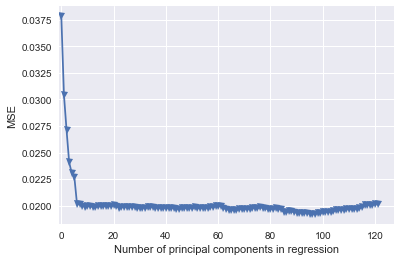

0.019232132243604896


In [520]:
n=len(features)
kf_10 = cross_validation.KFold(n,n_folds=10,shuffle=True,random_state=1)
mse = []
regr = LinearRegression()
for i in np.arange(1,123):
    score = model_selection.cross_val_score(regr,features[:,:i],training_dataframe_label,cv=kf_10,scoring='neg_mean_squared_error').mean()
    mse.append(-score)
plt.plot(mse,'-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin = -1)
plt.show()
print(min(mse))

In [521]:
number_of_components = mse.index(min(mse))
number_of_components

95

In [519]:
explained_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
explained_var = explained_var.tolist()
print(explained_var)

[26.400000000000002, 44.44, 52.36, 59.34, 63.74, 67.61, 70.72, 73.45, 75.7, 77.49000000000001, 78.87, 80.19, 81.44, 82.55, 83.58, 84.51, 85.30000000000001, 86.03000000000002, 86.72000000000001, 87.38000000000001, 88.03000000000002, 88.64000000000001, 89.22000000000001, 89.79, 90.31, 90.78, 91.23, 91.65, 92.06, 92.44, 92.81, 93.16, 93.5, 93.82, 94.13, 94.42999999999999, 94.71, 94.97, 95.22, 95.46, 95.69, 95.91, 96.11999999999999, 96.32, 96.50999999999999, 96.69, 96.86, 97.03, 97.19, 97.33, 97.47, 97.6, 97.72, 97.84, 97.95, 98.06, 98.16, 98.25999999999999, 98.35, 98.44, 98.53, 98.61, 98.69, 98.75999999999999, 98.82999999999998, 98.89999999999998, 98.95999999999998, 99.01999999999998, 99.07999999999998, 99.12999999999998, 99.17999999999998, 99.22999999999998, 99.27999999999997, 99.31999999999998, 99.35999999999999, 99.39999999999999, 99.44, 99.48, 99.51, 99.54, 99.57000000000001, 99.60000000000001, 99.63000000000001, 99.66000000000001, 99.68, 99.7, 99.72, 99.74, 99.75999999999999, 99.7799

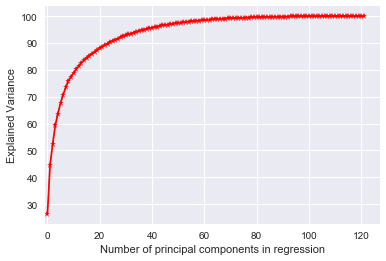

In [515]:
plt.plot(explained_var,'-*',color = 'red')
plt.ylabel('Explained Variance')
plt.xlabel('Number of principal components in regression')
plt.xlim(xmin = -1)
plt.show()

Here we see that we get the least MSE when number of principal components is M = 95. setting M=1 only captures 26% of all the variance, or information, in the predictors. In contrast, using M=95 increases the value to 99.87%.

In [540]:
X_reduced_test = pca.transform(scale(testing_dataframe))

# Train regression model on training data 
regr = LinearRegression()
regr.fit(features, training_dataframe_label)

# Prediction with test data
pred = regr.predict(X_reduced_test)
pca_test_error = mean_squared_error(testing_dataframe_label, pred)
pca_test_error

0.017356305127225347

As seen above this test set MSE is competitive with the results obtained using ridge regression and the lasso.  

(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [331]:
mse = []
# np.random.random(0.0,100.0)
alpha_values = []
features = training_dataframe
target = training_dataframe_label
for j in range(0,20):
    i=random.uniform(0.0,100.0)
    clf = xg.XGBRegressor(reg_alpha=i)
    clf.fit(features, target)
    score = -1*model_selection.cross_val_score(clf, features,target, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    print('Alpha = ',i,', mse = ' ,score)
    alpha_values.append(i)
bestLamd= alpha_values[mse.index(min(mse))]
model = XGBRegressor(reg_alpha=bestLamd)
model.fit(features, target)
y_pred = model.predict(testing_dataframe)
mse=mean_squared_error(testing_dataframe_label, y_pred)
print('\nBest Alpha =',bestLamd,'and Testing Mean Square Error =',mse)

Alpha =  30.51437470361471 , mse =  0.025716241011523883
Alpha =  82.8138810805914 , mse =  0.03227724470744039
Alpha =  21.139327920187878 , mse =  0.024224979788590596
Alpha =  38.58463909154206 , mse =  0.026455197103559876
Alpha =  46.764707542074355 , mse =  0.02731997467512583
Alpha =  81.76135934739908 , mse =  0.03207216109263657
Alpha =  94.38367625378743 , mse =  0.03418590200923936
Alpha =  24.7277591525919 , mse =  0.025075821760204075
Alpha =  7.366766311616113 , mse =  0.0199958335977179
Alpha =  94.15552343217537 , mse =  0.03410431200925042
Alpha =  85.89851731575159 , mse =  0.03272470865550627
Alpha =  68.12744483318278 , mse =  0.03014574828162797
Alpha =  92.24561941706439 , mse =  0.033761191696226836
Alpha =  54.071767781746026 , mse =  0.02812246574839205
Alpha =  69.76162076709038 , mse =  0.030215913889361696
Alpha =  19.213304486064466 , mse =  0.023501943187745455
Alpha =  54.53778753790346 , mse =  0.0281538618861711
Alpha =  52.92515205882729 , mse =  0.027

The best alpha determined using CV is 7.366766311616113 and the test error is 0.01617867077017711. Hence we can see we get the least test error using the boosting tree when compared to Linear, Ridge, Lasso and PCA models.